**Credit Default Project**

Gotta first learn what a credit default is 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('SEC_EDGAR.csv')

C:\Users\adenm\AppData\Local\Temp\ipykernel_21228\1590958512.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SEC_EDGAR.csv')


In [4]:
df.head(5)

,Unnamed: 0,commonstocksharesissued,assetscurrent,accountspayablecurrent,commonstockvalue,liabilities,liabilitiesandstockholdersequity,stockholdersequity,earningspersharebasic,netincomeloss,...,officerscompensation,intangibleassetscurrent,salariesandwages,interestanddebtexpense,convertibledebt,assetmanagementcosts,accountsreceivablegross,directoperatingcosts,operatingcycle,stock
0,0,NaN,3.181000e+09,1.455000e+09,2000000.0,9.044000e+09,1.674100e+10,5.654000e+09,0.61,113000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA$
1,1,NaN,3.181000e+09,1.455000e+09,2000000.0,9.044000e+09,1.674100e+10,5.654000e+09,0.41,75000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA$
2,2,NaN,3.181000e+09,1.455000e+09,2000000.0,9.044000e+09,1.674100e+10,5.654000e+09,-1.15,-210000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA$
3,3,182930995.0,3.181000e+09,1.455000e+09,2000000.0,9.044000e+09,1.674100e+10,5.654000e+09,-1.15,-400000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA$
4,4,182471195.0,2.566000e+09,1.379000e+09,2000000.0,4.900000e+09,1.641300e+10,9.442000e+09,-1.15,-6000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA$


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101787 entries, 0 to 101786
Data columns (total 45 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        101787 non-null  int64  
 1   commonstocksharesissued           93171 non-null   float64
 2   assetscurrent                     77232 non-null   float64
 3   accountspayablecurrent            65972 non-null   float64
 4   commonstockvalue                  90450 non-null   float64
 5   liabilities                       82421 non-null   float64
 6   liabilitiesandstockholdersequity  101368 non-null  float64
 7   stockholdersequity                96902 non-null   float64
 8   earningspersharebasic             91441 non-null   float64
 9   netincomeloss                     97053 non-null   float64
 10  profitloss                        58173 non-null   float64
 11  costofgoodssold                   30120 non-null   f

In [6]:
df.isnull().sum()

Unnamed: 0                               0
commonstocksharesissued               8616
assetscurrent                        24555
accountspayablecurrent               35815
commonstockvalue                     11337
liabilities                          19366
liabilitiesandstockholdersequity       419
stockholdersequity                    4885
earningspersharebasic                10346
netincomeloss                         4734
profitloss                           43614
costofgoodssold                      71667
filing_date                              0
costsandexpenses                     71771
cash                                 81223
notespayable                         87412
preferredstockvalue                  85167
depreciation                         36740
operatingexpenses                    51869
revenues                             35561
land                                 79959
accountsreceivablenet                87788
deferredrevenue                      82103
grossprofit

In [7]:
newdf = df.dropna()

In [8]:
len(newdf.index)

0

**This data is wild, let's use some Credit Card Payment data instead**

In [9]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Default payment next month is our target value, with 1 = yes, and 0 = no. Also, the BAL is in New Taiwanese currency, and Sex: 1 = Male, 2 = Female.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [11]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

30000


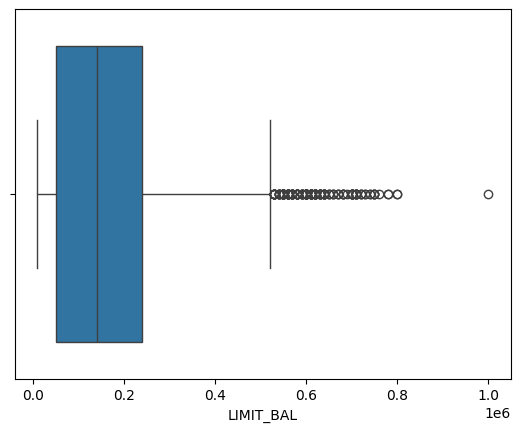

In [12]:
sns.boxplot(x = df['LIMIT_BAL'])
print(len(df.index))

Outlier, so we will drop. 

In [13]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

30000


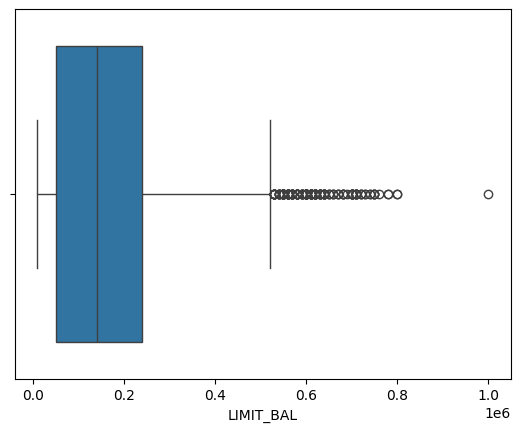

In [14]:
data = df[df['LIMIT_BAL'] < 900000]
sns.boxplot(x = df['LIMIT_BAL'])
print(len(df.index))

<Axes: >

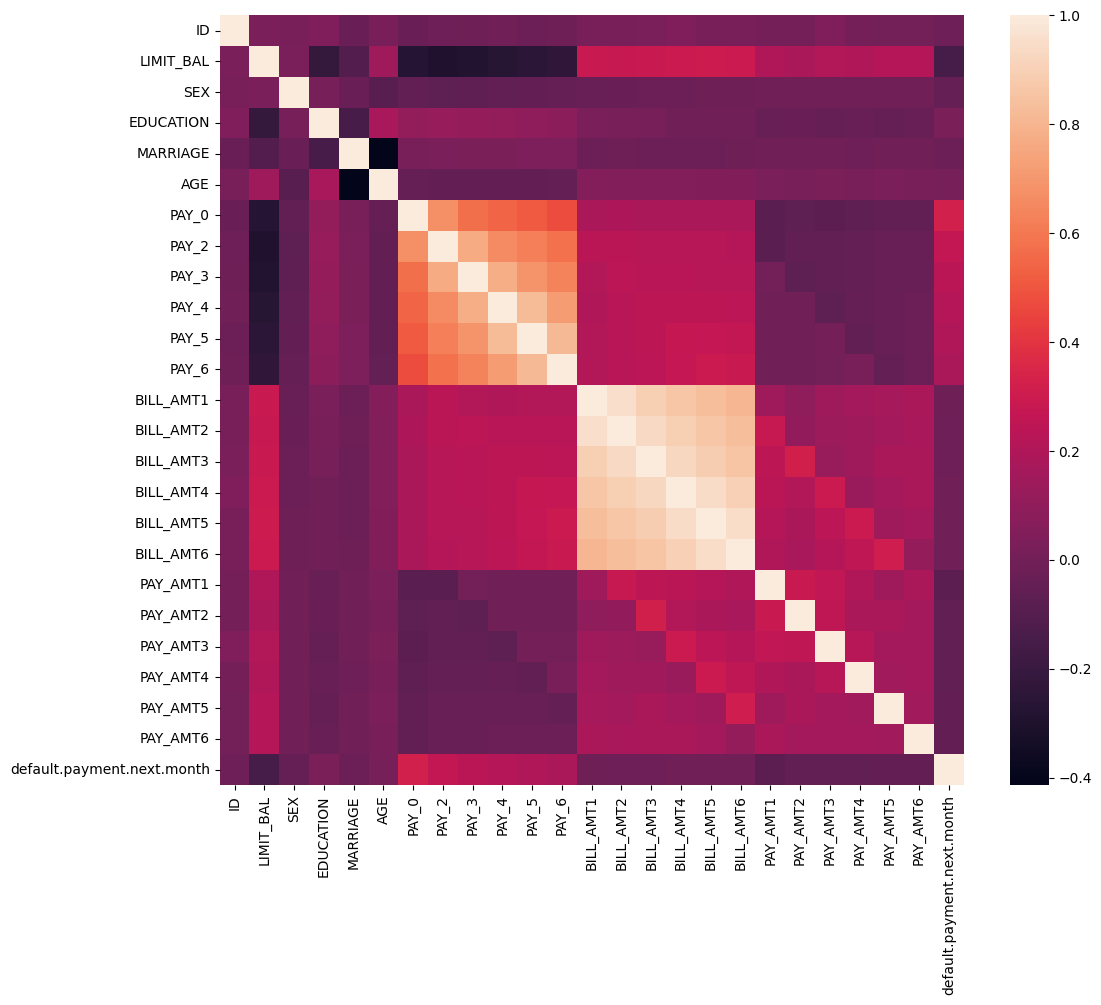

In [15]:
corr = data.corr()
plt.figure(figsize= (12,10))
sns.heatmap(corr)

No real strong correlations with our target, as well as no strong correlations between our other explanatory variables.

In [16]:
{'EDUCATION': 'EDU'}.items()

dict_items([('EDUCATION', 'EDU')])

In [17]:
def onehot_encode (df, column_dict):
    df = df.copy()

    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], dtype=int, prefix = prefix)
        df = pd.concat([df,dummies], axis = 1)
        df = df.drop(column, axis=1)

    return df

In [18]:
def preprocess_inputs (df):
    df = df.copy()
    df = df.drop('ID' , axis = 1)
    
    df = onehot_encode(df,
                       {
                           'EDUCATION' : 'EDU' , 
                           'MARRIAGE' : 'MAR'
                       }
                       )

    Y  = df['default.payment.next.month'].copy()
    X = df.drop('default.payment.next.month' , axis = 1).copy()
    #Scale X
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

    return X, Y 

X, Y = preprocess_inputs(data)

In [19]:
X

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_2,MAR_3
0,-1.137268,0.810183,-1.245990,1.794534,1.782323,-0.696647,-0.666615,-1.530014,-1.486009,-0.643730,...,-0.73834,1.066866,-0.442761,-0.064164,-0.097065,-0.041267,-0.042465,1.093820,-1.066509,-0.104327
1,-0.366012,0.810183,-1.029015,-0.874976,1.782323,0.138867,0.188722,0.234921,1.992293,-0.660490,...,-0.73834,1.066866,-0.442761,-0.064164,-0.097065,-0.041267,-0.042465,-0.914227,0.937638,-0.104327
2,-0.597389,0.810183,-0.161116,0.014861,0.111738,0.138867,0.188722,0.234921,0.253142,-0.298909,...,-0.73834,1.066866,-0.442761,-0.064164,-0.097065,-0.041267,-0.042465,-0.914227,0.937638,-0.104327
3,-0.905891,0.810183,0.164346,0.014861,0.111738,0.138867,0.188722,0.234921,0.253142,-0.057224,...,-0.73834,1.066866,-0.442761,-0.064164,-0.097065,-0.041267,-0.042465,1.093820,-1.066509,-0.104327
4,-0.905891,-1.234289,2.334093,-0.874976,0.111738,-0.696647,0.188722,0.234921,0.253142,-0.579683,...,-0.73834,1.066866,-0.442761,-0.064164,-0.097065,-0.041267,-0.042465,1.093820,-1.066509,-0.104327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0.405244,-1.234289,0.381320,0.014861,0.111738,0.138867,0.188722,0.234921,0.253142,1.875576,...,-0.73834,-0.937325,2.258557,-0.064164,-0.097065,-0.041267,-0.042465,1.093820,-1.066509,-0.104327
29995,-0.134635,-1.234289,0.815270,-0.874976,-0.723554,-0.696647,-0.666615,0.234921,0.253142,-0.674092,...,-0.73834,-0.937325,2.258557,-0.064164,-0.097065,-0.041267,-0.042465,-0.914227,0.937638,-0.104327
29996,-1.060142,-1.234289,0.164346,3.574208,2.617615,1.809896,-0.666615,0.234921,0.253142,-0.648468,...,-0.73834,1.066866,-0.442761,-0.064164,-0.097065,-0.041267,-0.042465,-0.914227,0.937638,-0.104327
29997,-0.674514,-1.234289,0.598295,0.904698,-0.723554,0.138867,0.188722,0.234921,-0.616434,-0.719403,...,-0.73834,-0.937325,2.258557,-0.064164,-0.097065,-0.041267,-0.042465,1.093820,-1.066509,-0.104327


In [20]:
from sklearn.model_selection import KFold
cross_val = KFold(n_splits= 5 , shuffle= True, random_state= 123)
cross_val

KFold(n_splits=5, random_state=123, shuffle=True)

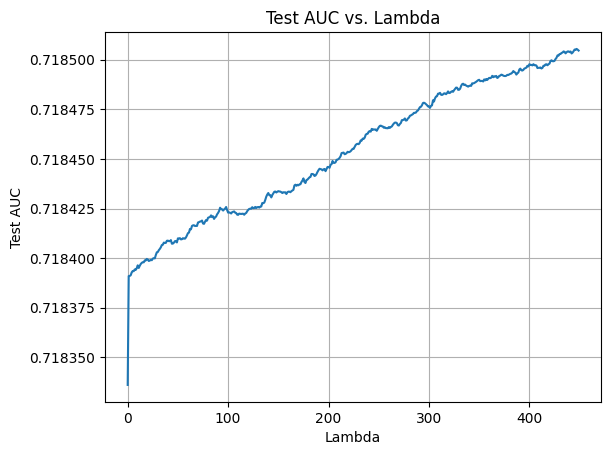

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

r_results = []

for lamb in np.arange(0, 450, 1):
    ridge = Ridge(alpha=lamb, max_iter=1000)

    # Perform cross-validation
    rk = cross_val_score(ridge, X, Y, cv=cross_val, scoring="roc_auc")
    rr2 = rk.mean()
    rstd = rk.std()
    rd = {"Lambda": lamb, "Test AUC": rr2, "Std": rstd}
    r_results.append(rd)

ridge_results = pd.DataFrame(r_results)
plt.plot(ridge_results['Lambda'], ridge_results['Test AUC'])
plt.xlabel('Lambda')
plt.ylabel('Test AUC')
plt.title('Test AUC vs. Lambda')
plt.grid(True)
plt.show()


In [22]:
ridge_results.nlargest(1,"Test AUC")

,Lambda,Test AUC,Std
447,447,0.718505,0.009403


C:\Users\adenm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\adenm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\adenm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider i

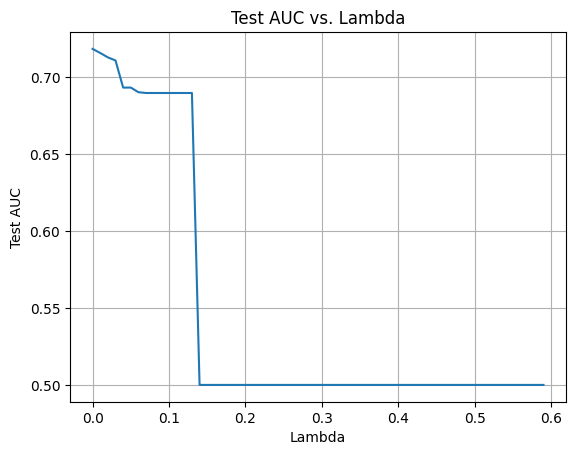

In [24]:
from sklearn.linear_model import Lasso

results = []
for lamb in np.arange(0, 0.6, 0.01):
    lasso = Lasso(alpha=lamb, max_iter=1000)
    auc_scores = cross_val_score(lasso, X, Y, cv=cross_val, scoring="roc_auc")
    test_auc = auc_scores.mean()
    std_dev = auc_scores.std()
    results.append({"Lambda": lamb, "Test AUC": test_auc, "std": std_dev})

results_df = pd.DataFrame(results)

plt.plot(results_df['Lambda'], results_df['Test AUC'])
plt.xlabel('Lambda')
plt.ylabel('Test AUC')
plt.title('Test AUC vs. Lambda')
plt.grid(True)
plt.show()

In [25]:
results_df.nlargest(1,"Test AUC")

,Lambda,Test AUC,std
0,0.0,0.718391,0.009563


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state=123)

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion= "gini" , max_depth=8, min_samples_split= 10 , random_state=5, )
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [29]:
clf.feature_importances_

array([3.22826220e-02, 2.24093037e-03, 1.55893998e-02, 2.46641303e-01,
       1.42757049e-01, 9.20174176e-02, 6.92866727e-02, 5.33891309e-02,
       5.13097183e-02, 2.54459517e-02, 2.49016852e-02, 1.99280536e-02,
       1.78895939e-02, 1.78666115e-02, 1.81044261e-02, 4.26799639e-02,
       3.01424788e-02, 2.52512033e-02, 2.51461272e-02, 1.92253788e-02,
       1.68260075e-02, 0.00000000e+00, 1.95465037e-03, 1.63137610e-03,
       1.78469487e-03, 1.21564368e-04, 8.01872213e-04, 2.77743074e-04,
       2.99653047e-04, 1.94283375e-03, 1.67938487e-03, 5.84501944e-04])

In [30]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [31]:
Y_pred = clf.predict(X_test)

In [32]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(Y_test, Y_pred)

array([[5605,  255],
       [1107,  533]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8184

In [35]:
cross_val_score(clf, X_train, Y_train, cv= 10)

array([0.82088889, 0.80888889, 0.81466667, 0.80977778, 0.81644444,
       0.82666667, 0.82266667, 0.82755556, 0.80933333, 0.82303246])

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      6712
           1       0.33      0.68      0.44       788

    accuracy                           0.82      7500
   macro avg       0.64      0.76      0.67      7500
weighted avg       0.89      0.82      0.84      7500



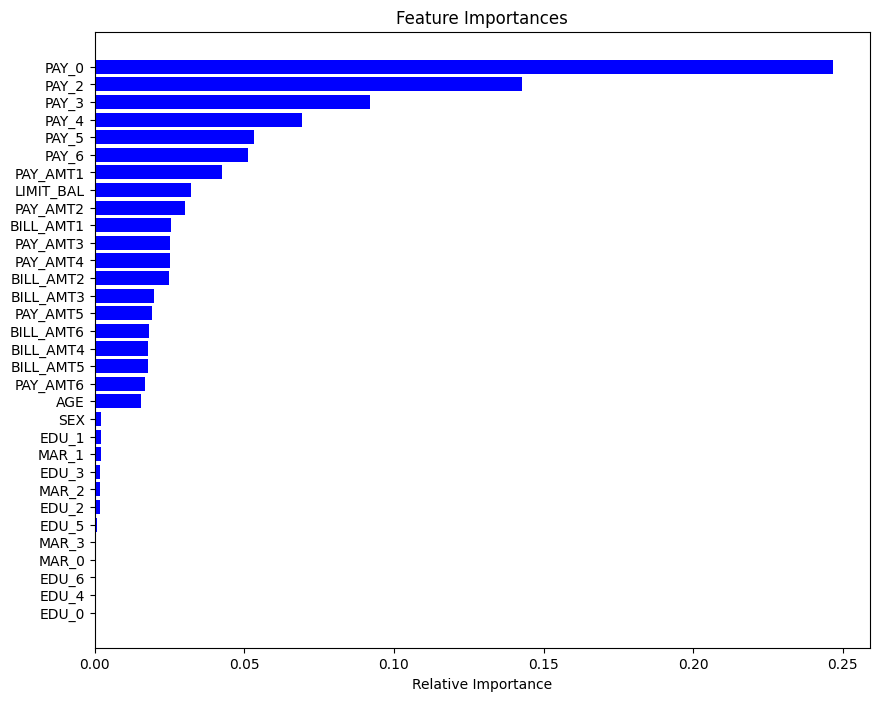

In [48]:
features = X.columns
importance = clf.feature_importances_
indices = np.argsort(importance)
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color = 'b')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
